In [11]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('data/brainstorming.csv')

In [13]:
df.head()

,ideas,requirement_node,label,0,1,2,3,4,5,6,...,17,18,19,20,21,22,23,24,25,26
0,"Screens on shopping carts provide recs, distra...",N,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,In aisle screens that detect user's presence a...,N,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Ease of use,Y,2,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Digital wine glasses,N,3,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Pair with Coravin system for experienced users,N,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
index = df['label']
df1 = df.set_index(index)
df1 = df1.drop(columns=['label', 'ideas', 'requirement_node'])
display(df1.head())

graph_matrix = df1.values

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
label,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
g = nx.from_numpy_matrix(graph_matrix)

C:\Users\dbarker3\myAnaconda\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\dbarker3\myAnaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


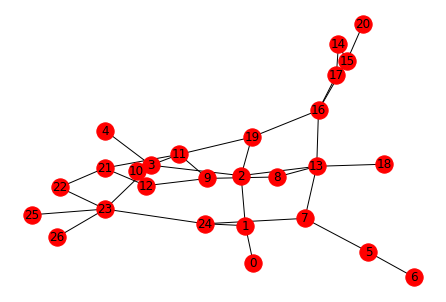

In [17]:
# Plot it
nx.draw(g, with_labels=True)
plt.show()


In [7]:
pr = nx.pagerank(g, alpha=0.85)

In [8]:
x = pd.Series([k for k in pr.keys()], name='idea_key')
y = pd.Series([j for j in pr.values()], name='page_rank')

dfp = pd.concat([x, y], axis=1)
dfp = dfp.set_index('idea_key', drop=True)
dfp = dfp.sort_values(by='page_rank', ascending=False).reset_index()

display(dfp.head())

,idea_key,page_rank
0,23,0.074152
1,13,0.067801
2,16,0.054479
3,2,0.053770
4,11,0.051326


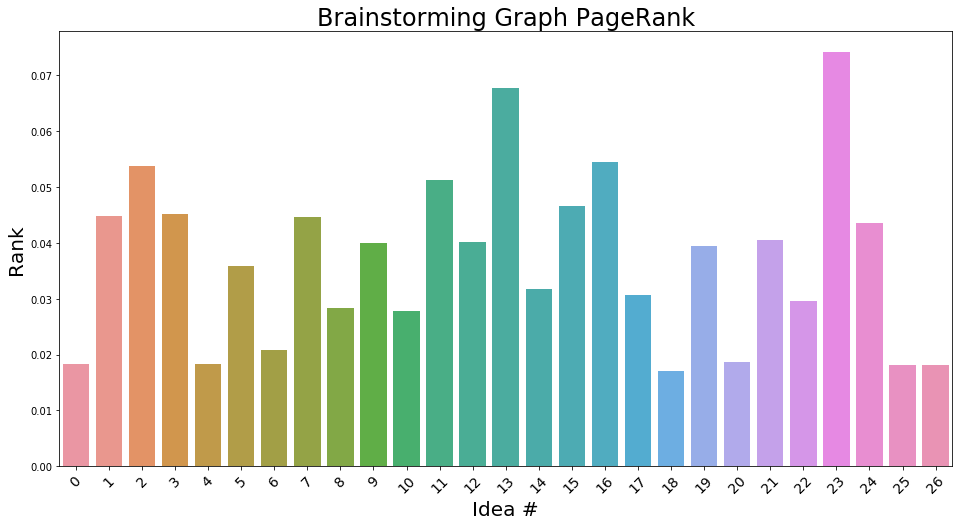

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='idea_key', y='page_rank', data=dfp, ax=ax)
ax.set_ylabel('Rank', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
ax.set_xlabel('Idea #', fontsize=20)
plt.title('Brainstorming Graph PageRank', fontsize=24)
plt.show()
plt.close()